<a href="https://colab.research.google.com/github/JOSHITHA6/GDP_PRODUCTIVITY_INFO/blob/main/GDP_PRODUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:

# Raw GitHub URL for your dataset
url = 'https://raw.githubusercontent.com/JOSHITHA6/GDP_PRODUCTIVITY_INFO/main/GDP_SECTOR_INCOME/GDP_Sector_Income_2019_2023_30Cities.csv'

# Load the dataset
data = pd.read_csv(url)

# Preview the dataset
#print(data.head())


In [3]:
#STEP-1: Check for missing values

print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
City                  0
Year                  0
GDP (in billion $)    0
Agriculture (%)       0
Industry (%)          0
Services (%)          0
Technology (%)        0
dtype: int64


In [4]:
#Step-2: Handle Missing values(Median Imputation)
numeric_cols=data.select_dtypes(include='number').columns

In [5]:
#Replace missing values with the median of each column
data[numeric_cols]=data[numeric_cols].fillna(data[numeric_cols].median())

In [6]:
# Verify if missing values are handled
print("\nMissing values after median imputation:")
print(data.isnull().sum())


Missing values after median imputation:
City                  0
Year                  0
GDP (in billion $)    0
Agriculture (%)       0
Industry (%)          0
Services (%)          0
Technology (%)        0
dtype: int64


In [7]:
#Step-3
print("\nColumn data types before adjustment:")
print(data.dtypes)


Column data types before adjustment:
City                   object
Year                    int64
GDP (in billion $)    float64
Agriculture (%)       float64
Industry (%)          float64
Services (%)          float64
Technology (%)        float64
dtype: object


In [8]:
#Step-4: Check for Duplicates
print("\nNumber of duplicate rows:",data.duplicated().sum())


Number of duplicate rows: 0


In [9]:
#Step-5

assert(data['GDP (in billion $)']>=0).all(), "Negative GDP values found!"


In [10]:

data['Sector Sum'] = data[['Agriculture (%)', 'Industry (%)', 'Services (%)', 'Technology (%)']].sum(axis=1)




In [11]:
print(data[['Sector Sum']].head())

   Sector Sum
0       109.3
1       118.3
2       104.6
3       119.4
4       104.8


In [12]:
# Drop validation column
data.drop(columns='Sector Sum', inplace=True)

In [13]:
# Step 6: Rename Columns for Consistency

data.rename(columns={
    'GDP (in billion $)': 'GDP_Billion_USD',
    'Agriculture (%)': 'Agriculture_Percent',
    'Industry (%)': 'Industry_Percent',
    'Services (%)': 'Services_Percent',
    'Technology (%)': 'Technology_Percent'
}, inplace=True)

In [14]:
print("\nUpdated column names:")
print(data.columns)


Updated column names:
Index(['City', 'Year', 'GDP_Billion_USD', 'Agriculture_Percent',
       'Industry_Percent', 'Services_Percent', 'Technology_Percent'],
      dtype='object')


In [15]:
# Create the cleaned dataset by performing your cleaning and preprocessing
cleaned_data = data.copy()

In [16]:
# Combine original and cleaned datasets for comparison
# This will add the cleaned columns to the original dataset for comparison
comparison = pd.concat([data, cleaned_data], axis=1, keys=["Original", "Cleaned"])

# Show the combined comparison (only first few rows to prevent large output)
comparison.head()

Original                                                             \
        City  Year GDP_Billion_USD Agriculture_Percent Industry_Percent   
0  Ahmedabad  2019           187.2                15.7             32.1   
1  Ahmedabad  2020           211.5                11.6             37.8   
2  Ahmedabad  2021           247.9                12.9             31.4   
3  Ahmedabad  2022            71.8                 5.3             36.7   
4  Ahmedabad  2023           294.7                17.0             29.2   

                                         Cleaned                        \
  Services_Percent Technology_Percent       City  Year GDP_Billion_USD   
0             40.9               20.6  Ahmedabad  2019           187.2   
1             49.3               19.6  Ahmedabad  2020           211.5   
2             48.5               11.8  Ahmedabad  2021           247.9   
3             45.6               31.8  Ahmedabad  2022            71.8   
4             45.6               13.0  Ahmedabad  2023           294.7   

                                                                            
  Agriculture_Percent Industry_Percent Services_Percent Technology_Percent  
0                15.7             32.1             40.9               20.6  
1                11.6             37.8             49.3               19.6  
2                12.9             31.4             48.5               11.8  
3                 5.3             36.7             45.6               31.8  
4                17.0             29.2             45.6               13.0

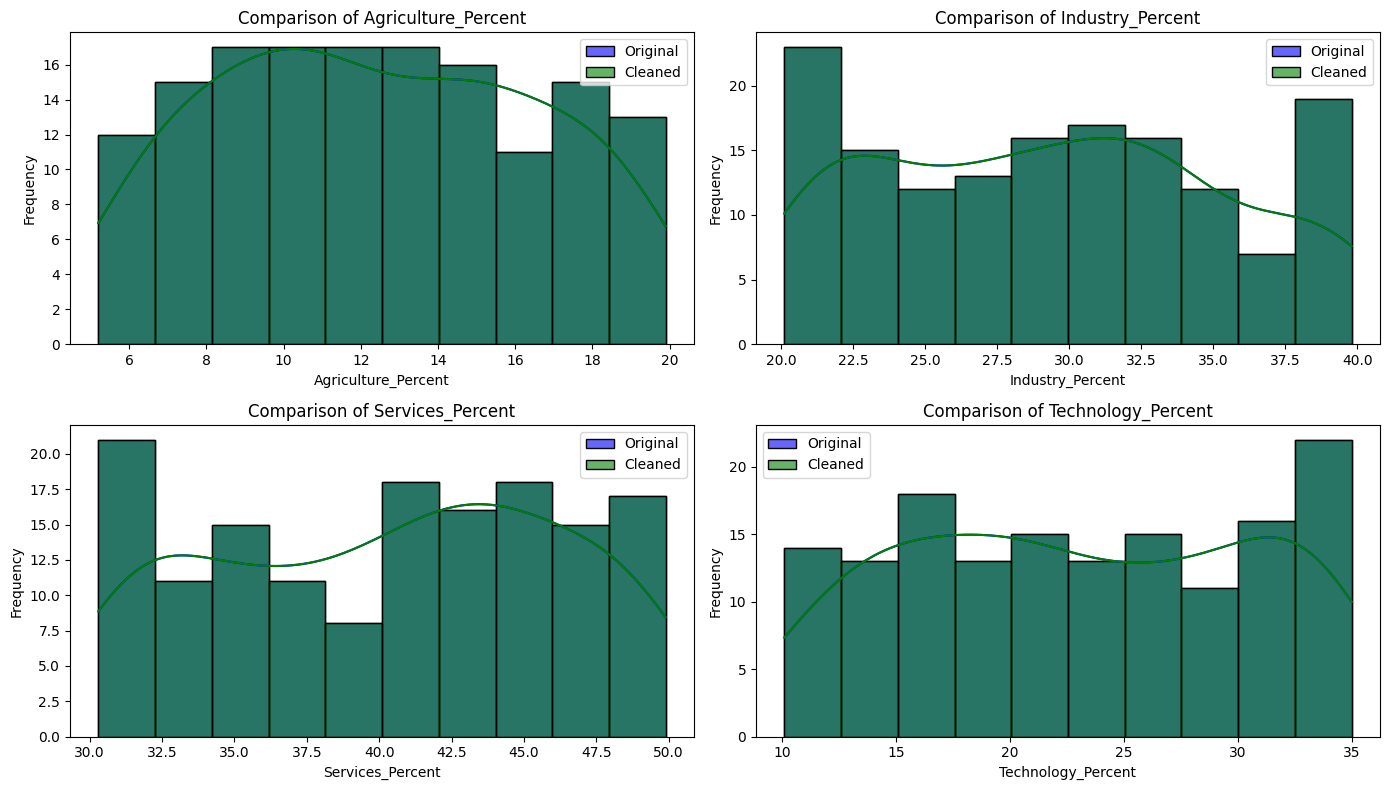

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to compare (updated with new names)
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

# Create a plot for each of the specified columns
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.histplot(data[column], color='blue', label='Original', kde=True, bins=10, alpha=0.6)
    sns.histplot(cleaned_data[column], color='green', label='Cleaned', kde=True, bins=10, alpha=0.6)

    # Add titles and labels
    plt.title(f"Comparison of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()


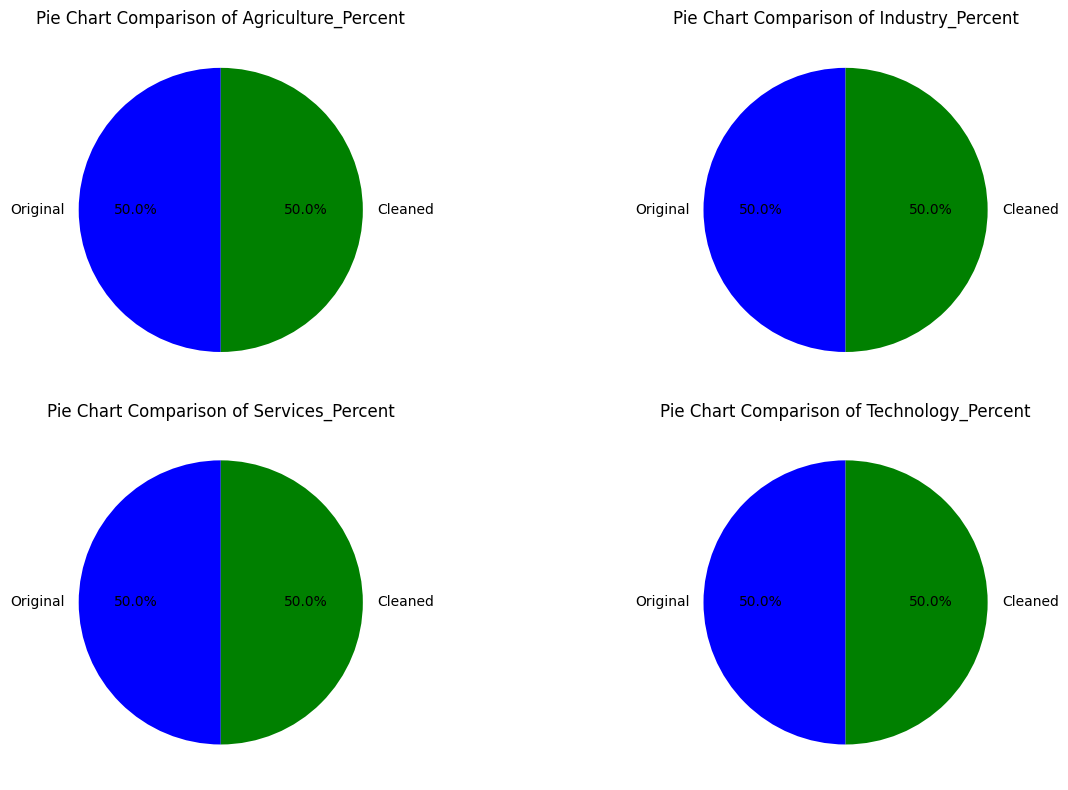

In [18]:
import matplotlib.pyplot as plt

# List of columns to compare (updated with new names)
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

# Create a plot for each of the specified columns
plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns

    # Prepare the data for pie charts (sum of values for each column)
    original_sum = data[column].sum()
    cleaned_sum = cleaned_data[column].sum()

    # Pie chart labels and values
    labels = ['Original', 'Cleaned']
    values = [original_sum, cleaned_sum]

    # Create pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
    plt.title(f"Pie Chart Comparison of {column}")

plt.tight_layout()  # Adjust layout for better readability
plt.show()


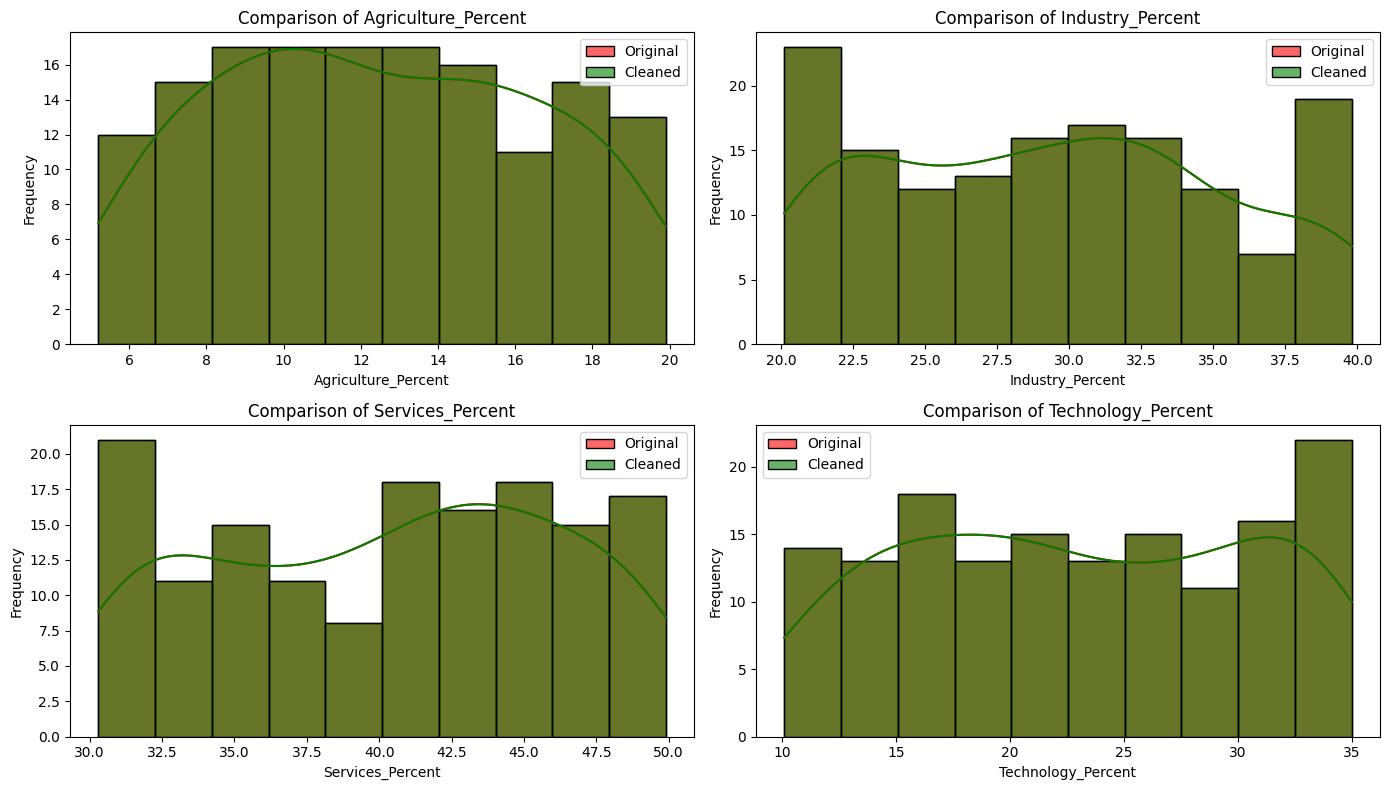

In [19]:
# Compare histograms or boxplots before and after cleaning
columns_to_compare = ['Agriculture_Percent', 'Industry_Percent', 'Services_Percent', 'Technology_Percent']

plt.figure(figsize=(14, 8))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], color='red', label='Original', kde=True, bins=10, alpha=0.6)
    sns.histplot(cleaned_data[column], color='green', label='Cleaned', kde=True, bins=10, alpha=0.6)
    plt.title(f"Comparison of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Compare summary statistics
print("Summary Statistics - Original Data:")
print(data[columns_to_compare].describe())
print()
print()
print("\nSummary Statistics - Cleaned Data:")
print(cleaned_data[columns_to_compare].describe())


Summary Statistics - Original Data:
       Agriculture_Percent  Industry_Percent  Services_Percent  \
count           150.000000        150.000000        150.000000   
mean             12.416000         29.382667         40.324000   
std               4.137796          5.944415          5.940202   
min               5.200000         20.100000         30.300000   
25%               9.200000         24.075000         35.225000   
50%              11.950000         29.200000         40.800000   
75%              15.500000         33.825000         45.000000   
max              19.900000         39.800000         49.900000   

       Technology_Percent  
count          150.000000  
mean            22.996667  
std              7.591751  
min             10.100000  
25%             16.125000  
50%             22.650000  
75%             30.150000  
max             35.000000  



Summary Statistics - Cleaned Data:
       Agriculture_Percent  Industry_Percent  Services_Percent  \
count        


**OBSERVATIONS AND KEY-TAKE AWAYS**


The dataset which I have downloaded from kaggle is such a fine and high quality data beacause few datsets obtained from govt. websites will be of highly fine and of high quality. I've found this difference by comparing original data and cleaned data. In pie charts and summary statistics, no change is seen--> indicating that the dataset which I've got is very clean dataset and actually doesnt need any pre-processing/cleaning.





Also, there are no missing values/nan values found indicating that the dataset is already clean and pre-processed




In [21]:

# Assuming `cleaned_data` is your pre-processed DataFrame

# Step 1: Calculate GDP contribution for each sector
cleaned_data['Agriculture_GDP'] = (cleaned_data['Agriculture_Percent'] / 100) * cleaned_data['GDP_Billion_USD']
cleaned_data['Industry_GDP'] = (cleaned_data['Industry_Percent'] / 100) * cleaned_data['GDP_Billion_USD']
cleaned_data['Services_GDP'] = (cleaned_data['Services_Percent'] / 100) * cleaned_data['GDP_Billion_USD']
cleaned_data['Technology_GDP'] = (cleaned_data['Technology_Percent'] / 100) * cleaned_data['GDP_Billion_USD']

# Step 2: Calculate Sectoral Efficiency (GDP per percentage point)
cleaned_data['Agriculture_Efficiency'] = cleaned_data['Agriculture_GDP'] / cleaned_data['Agriculture_Percent']
cleaned_data['Industry_Efficiency'] = cleaned_data['Industry_GDP'] / cleaned_data['Industry_Percent']
cleaned_data['Services_Efficiency'] = cleaned_data['Services_GDP'] / cleaned_data['Services_Percent']
cleaned_data['Technology_Efficiency'] = cleaned_data['Technology_GDP'] / cleaned_data['Technology_Percent']

# Step 3: Calculate Total Sectoral Contributions
sector_contributions = cleaned_data[['Agriculture_GDP', 'Industry_GDP', 'Services_GDP', 'Technology_GDP']].sum()

# Step 4: GDP per Capita (if Population column exists)
if 'Population' in cleaned_data.columns:
    cleaned_data['GDP_Per_Capita'] = (cleaned_data['GDP_Billion_USD'] * 1e9) / cleaned_data['Population']

# Step 5: Aggregate Data for Reporting
summary_metrics = {
    'Total GDP (Billion USD)': cleaned_data['GDP_Billion_USD'].sum(),
    'Total Agriculture GDP': sector_contributions['Agriculture_GDP'],
    'Total Industry GDP': sector_contributions['Industry_GDP'],
    'Total Services GDP': sector_contributions['Services_GDP'],
    'Total Technology GDP': sector_contributions['Technology_GDP'],
    'Sector Contributions (%)': (sector_contributions / sector_contributions.sum()) * 100
}

# Display results
print("Sectoral Contributions to GDP (Billion USD):")
print(sector_contributions)

print("\nSummary Metrics:")
for key, value in summary_metrics.items():
    print(f"{key}: {value}")


Sectoral Contributions to GDP (Billion USD):
Agriculture_GDP     3082.2946
Industry_GDP        7405.3455
Services_GDP       10077.5692
Technology_GDP      5695.6423
dtype: float64

Summary Metrics:
Total GDP (Billion USD): 24909.199999999997
Total Agriculture GDP: 3082.2945999999997
Total Industry GDP: 7405.345500000001
Total Services GDP: 10077.5692
Total Technology GDP: 5695.6422999999995
Sector Contributions (%): Agriculture_GDP    11.737223
Industry_GDP       28.199183
Services_GDP       38.374876
Technology_GDP     21.688719
dtype: float64


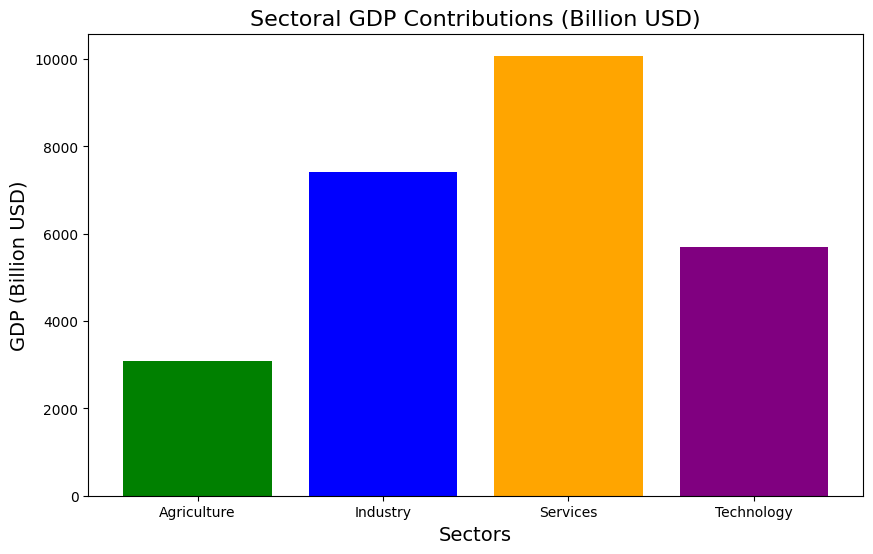

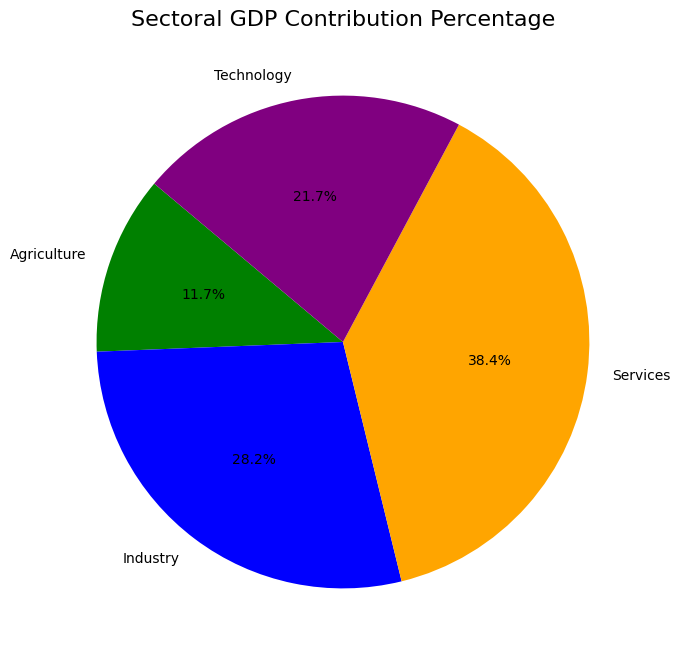

In [22]:
import matplotlib.pyplot as plt

# Total contributions by sector
sectors = ['Agriculture', 'Industry', 'Services', 'Technology']
sector_gdp = [
    sector_contributions['Agriculture_GDP'],
    sector_contributions['Industry_GDP'],
    sector_contributions['Services_GDP'],
    sector_contributions['Technology_GDP']
]

# Bar Chart: Sectoral GDP Contributions
plt.figure(figsize=(10, 6))
plt.bar(sectors, sector_gdp, color=['green', 'blue', 'orange', 'purple'])
plt.title("Sectoral GDP Contributions (Billion USD)", fontsize=16)
plt.ylabel("GDP (Billion USD)", fontsize=14)
plt.xlabel("Sectors", fontsize=14)
plt.show()

# Pie Chart: Sectoral Percentage Contributions
sector_percent = (sector_gdp / sum(sector_gdp)) * 100

plt.figure(figsize=(8, 8))
plt.pie(sector_percent, labels=sectors, autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'orange', 'purple'])
plt.title("Sectoral GDP Contribution Percentage", fontsize=16)
plt.show()


In [23]:
import pandas as pd

# Assuming `cleaned_data` is the pre-processed DataFrame
# Ensure you have a 'Year' column in the dataset

# Step 1: Group by Year
yearly_data = cleaned_data.groupby('Year')

# Step 2: Calculate Year-by-Year Metrics
yearly_metrics = yearly_data.agg({
    'GDP_Billion_USD': 'sum',  # Total GDP per year
    'Agriculture_Percent': 'mean',
    'Industry_Percent': 'mean',
    'Services_Percent': 'mean',
    'Technology_Percent': 'mean',
    'Agriculture_GDP': 'sum',
    'Industry_GDP': 'sum',
    'Services_GDP': 'sum',
    'Technology_GDP': 'sum'
}).reset_index()

# Rename columns for clarity
yearly_metrics.rename(columns={
    'GDP_Billion_USD': 'Total_GDP_Billion_USD',
    'Agriculture_Percent': 'Avg_Agriculture_Percent',
    'Industry_Percent': 'Avg_Industry_Percent',
    'Services_Percent': 'Avg_Services_Percent',
    'Technology_Percent': 'Avg_Technology_Percent',
    'Agriculture_GDP': 'Total_Agriculture_GDP',
    'Industry_GDP': 'Total_Industry_GDP',
    'Services_GDP': 'Total_Services_GDP',
    'Technology_GDP': 'Total_Technology_GDP'
}, inplace=True)

# Step 3: Calculate Percentages for Each Sector
yearly_metrics['Agriculture_Contribution_Percent'] = (yearly_metrics['Total_Agriculture_GDP'] / yearly_metrics['Total_GDP_Billion_USD']) * 100
yearly_metrics['Industry_Contribution_Percent'] = (yearly_metrics['Total_Industry_GDP'] / yearly_metrics['Total_GDP_Billion_USD']) * 100
yearly_metrics['Services_Contribution_Percent'] = (yearly_metrics['Total_Services_GDP'] / yearly_metrics['Total_GDP_Billion_USD']) * 100
yearly_metrics['Technology_Contribution_Percent'] = (yearly_metrics['Total_Technology_GDP'] / yearly_metrics['Total_GDP_Billion_USD']) * 100

# Display Year-by-Year Analysis
print(yearly_metrics)


   Year  Total_GDP_Billion_USD  Avg_Agriculture_Percent  Avg_Industry_Percent  \
0  2019                 5343.4                13.356667             31.160000   
1  2020                 4012.9                12.346667             26.893333   
2  2021                 5080.5                11.840000             29.740000   
3  2022                 4933.9                11.986667             30.023333   
4  2023                 5538.5                12.550000             29.096667   

   Avg_Services_Percent  Avg_Technology_Percent  Total_Agriculture_GDP  \
0             39.600000               21.513333               719.5092   
1             39.330000               22.860000               506.2827   
2             40.893333               22.180000               588.8616   
3             40.633333               24.853333               572.9301   
4             41.163333               23.576667               694.7110   

   Total_Industry_GDP  Total_Services_GDP  Total_Technology_GDP  \
0

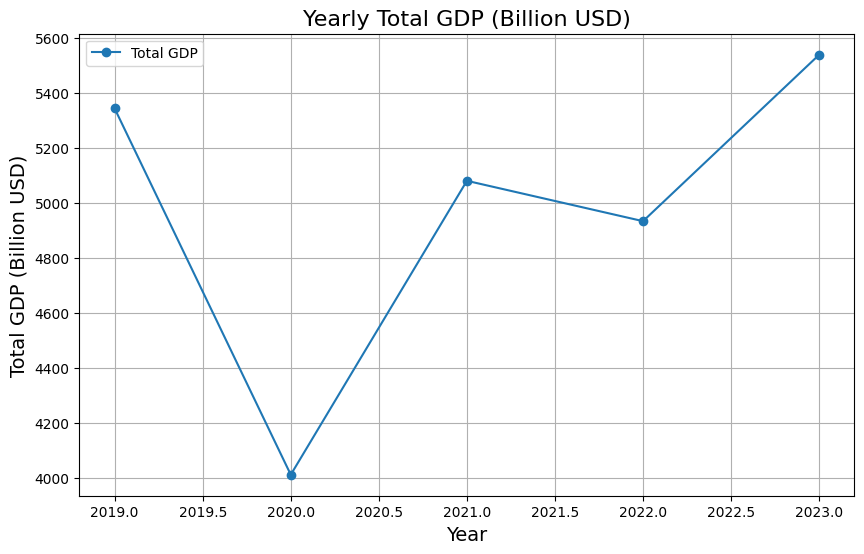

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_metrics['Year'], yearly_metrics['Total_GDP_Billion_USD'], marker='o', label='Total GDP')
plt.title("Yearly Total GDP (Billion USD)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total GDP (Billion USD)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


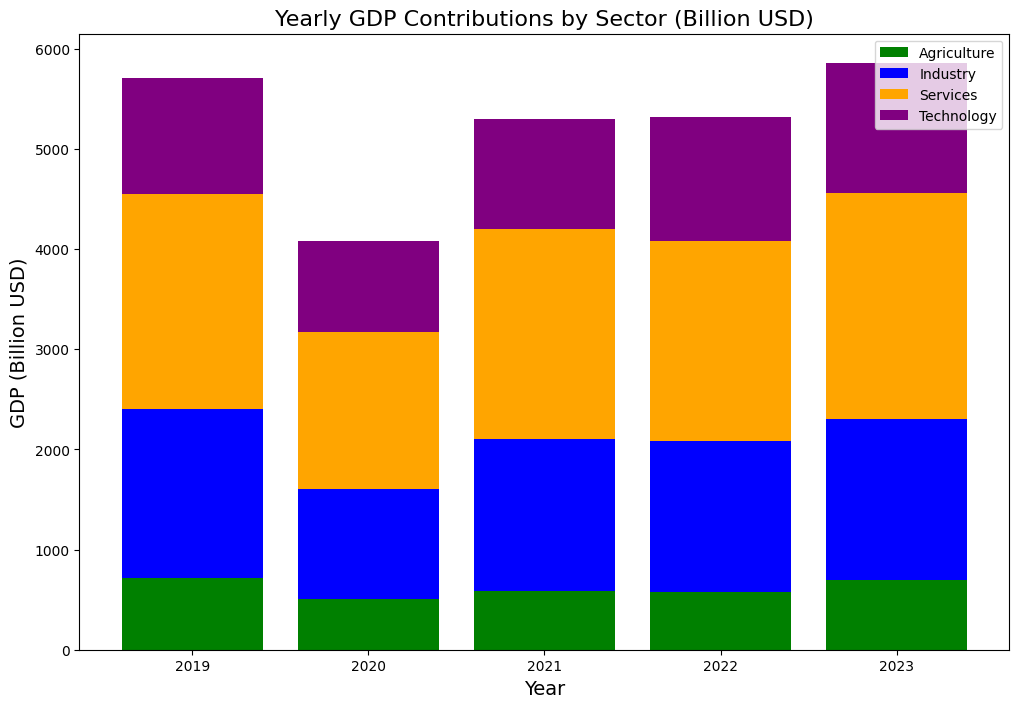

In [25]:
plt.figure(figsize=(12, 8))
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Agriculture_GDP'], label='Agriculture', color='green')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Industry_GDP'], label='Industry', bottom=yearly_metrics['Total_Agriculture_GDP'], color='blue')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Services_GDP'], label='Services', bottom=yearly_metrics['Total_Agriculture_GDP'] + yearly_metrics['Total_Industry_GDP'], color='orange')
plt.bar(yearly_metrics['Year'], yearly_metrics['Total_Technology_GDP'], label='Technology', bottom=yearly_metrics['Total_Agriculture_GDP'] + yearly_metrics['Total_Industry_GDP'] + yearly_metrics['Total_Services_GDP'], color='purple')
plt.title("Yearly GDP Contributions by Sector (Billion USD)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP (Billion USD)", fontsize=14)
plt.legend()
plt.show()
